In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("./Bolangir District Treasury Data.csv")

In [3]:
df.shape

(5408, 11)

In [4]:
df.head()

,DDO Code,DDO Name,Budget Code,Allotment Serial No,Allotment Date,Allotment ID,Alloted Amount,Expenditure,Surrender/Withdrwal,Deduct Amount,Balance
0,BLGAGR001,"District Agriculture Officer, Patnagarh",23-2401-00-001-1159-01003-136-0-1-0,1,18-Apr-16,155,32000,32000,0,0,0
1,BLGAGR001,"District Agriculture Officer, Patnagarh",23-2401-00-001-1159-01003-156-0-1-0,2,18-Apr-16,156,43200,43200,0,0,0
2,BLGAGR001,"District Agriculture Officer, Patnagarh",23-2401-00-001-1159-01003-403-0-1-0,3,18-Apr-16,157,1920,1920,0,0,0
3,BLGAGR001,"District Agriculture Officer, Patnagarh",23-2401-00-001-1159-01003-516-0-1-0,4,18-Apr-16,158,224,224,0,0,0
4,BLGAGR001,"District Agriculture Officer, Patnagarh",23-2401-00-001-1159-06001-000-0-1-0,5,18-Apr-16,159,850,850,0,0,0


In [5]:
df.columns

Index([u'DDO Code', u'DDO Name', u'Budget Code', u'Allotment Serial No',
       u'Allotment Date', u'Allotment ID', u'Alloted Amount', u'Expenditure',
       u'Surrender/Withdrwal', u'Deduct Amount', u'Balance'],
      dtype='object')

In [6]:
df.dtypes

DDO Code               object
DDO Name               object
Budget Code            object
Allotment Serial No     int64
Allotment Date         object
Allotment ID            int64
Alloted Amount          int64
Expenditure             int64
Surrender/Withdrwal     int64
Deduct Amount           int64
Balance                 int64
dtype: object

In [7]:
df.describe()

,Allotment Serial No,Allotment ID,Alloted Amount,Expenditure,Surrender/Withdrwal,Deduct Amount,Balance
count,5408.000000,5408.000000,5.408000e+03,5.408000e+03,5.408000e+03,5408.0,5.408000e+03
mean,2.607433,2148.596893,7.430442e+05,7.080604e+05,9.768017e+03,0.0,2.521578e+04
std,2.580947,1924.219001,3.702209e+06,3.654463e+06,1.157334e+05,0.0,2.523651e+05
min,1.000000,1.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,1.000000,638.000000,6.400000e+03,4.000000e+03,0.000000e+00,0.0,0.000000e+00
50%,2.000000,1333.000000,3.310000e+04,2.375000e+04,0.000000e+00,0.0,0.000000e+00
75%,3.000000,3578.250000,2.604488e+05,2.220000e+05,0.000000e+00,0.0,0.000000e+00
max,23.000000,6543.000000,1.430000e+08,1.430000e+08,4.439122e+06,0.0,1.334498e+07


In [8]:
DdoByAllot_df = df.groupby(['DDO Name'])['Alloted Amount', 'Expenditure'].sum()
DdoByAllot_df.reset_index(level=0, inplace=True)
#DdoByAllot_df
DdoByAllot_df = DdoByAllot_df.sort_values("Alloted Amount", ascending=False)
DdoByAllot_df.head()

,DDO Name,Alloted Amount,Expenditure
40,"District Education Officer, Bolangir",965793191,957361898
19,"Block Education Officer,Patnagarh",203775122,195148891
13,"Block Education Officer,Bolangir Sadar",191243507,179684523
22,"Block Education Officer,Titilagarh",179142216,173413252
21,"Block Education Officer,Saintala",175612506,159750464


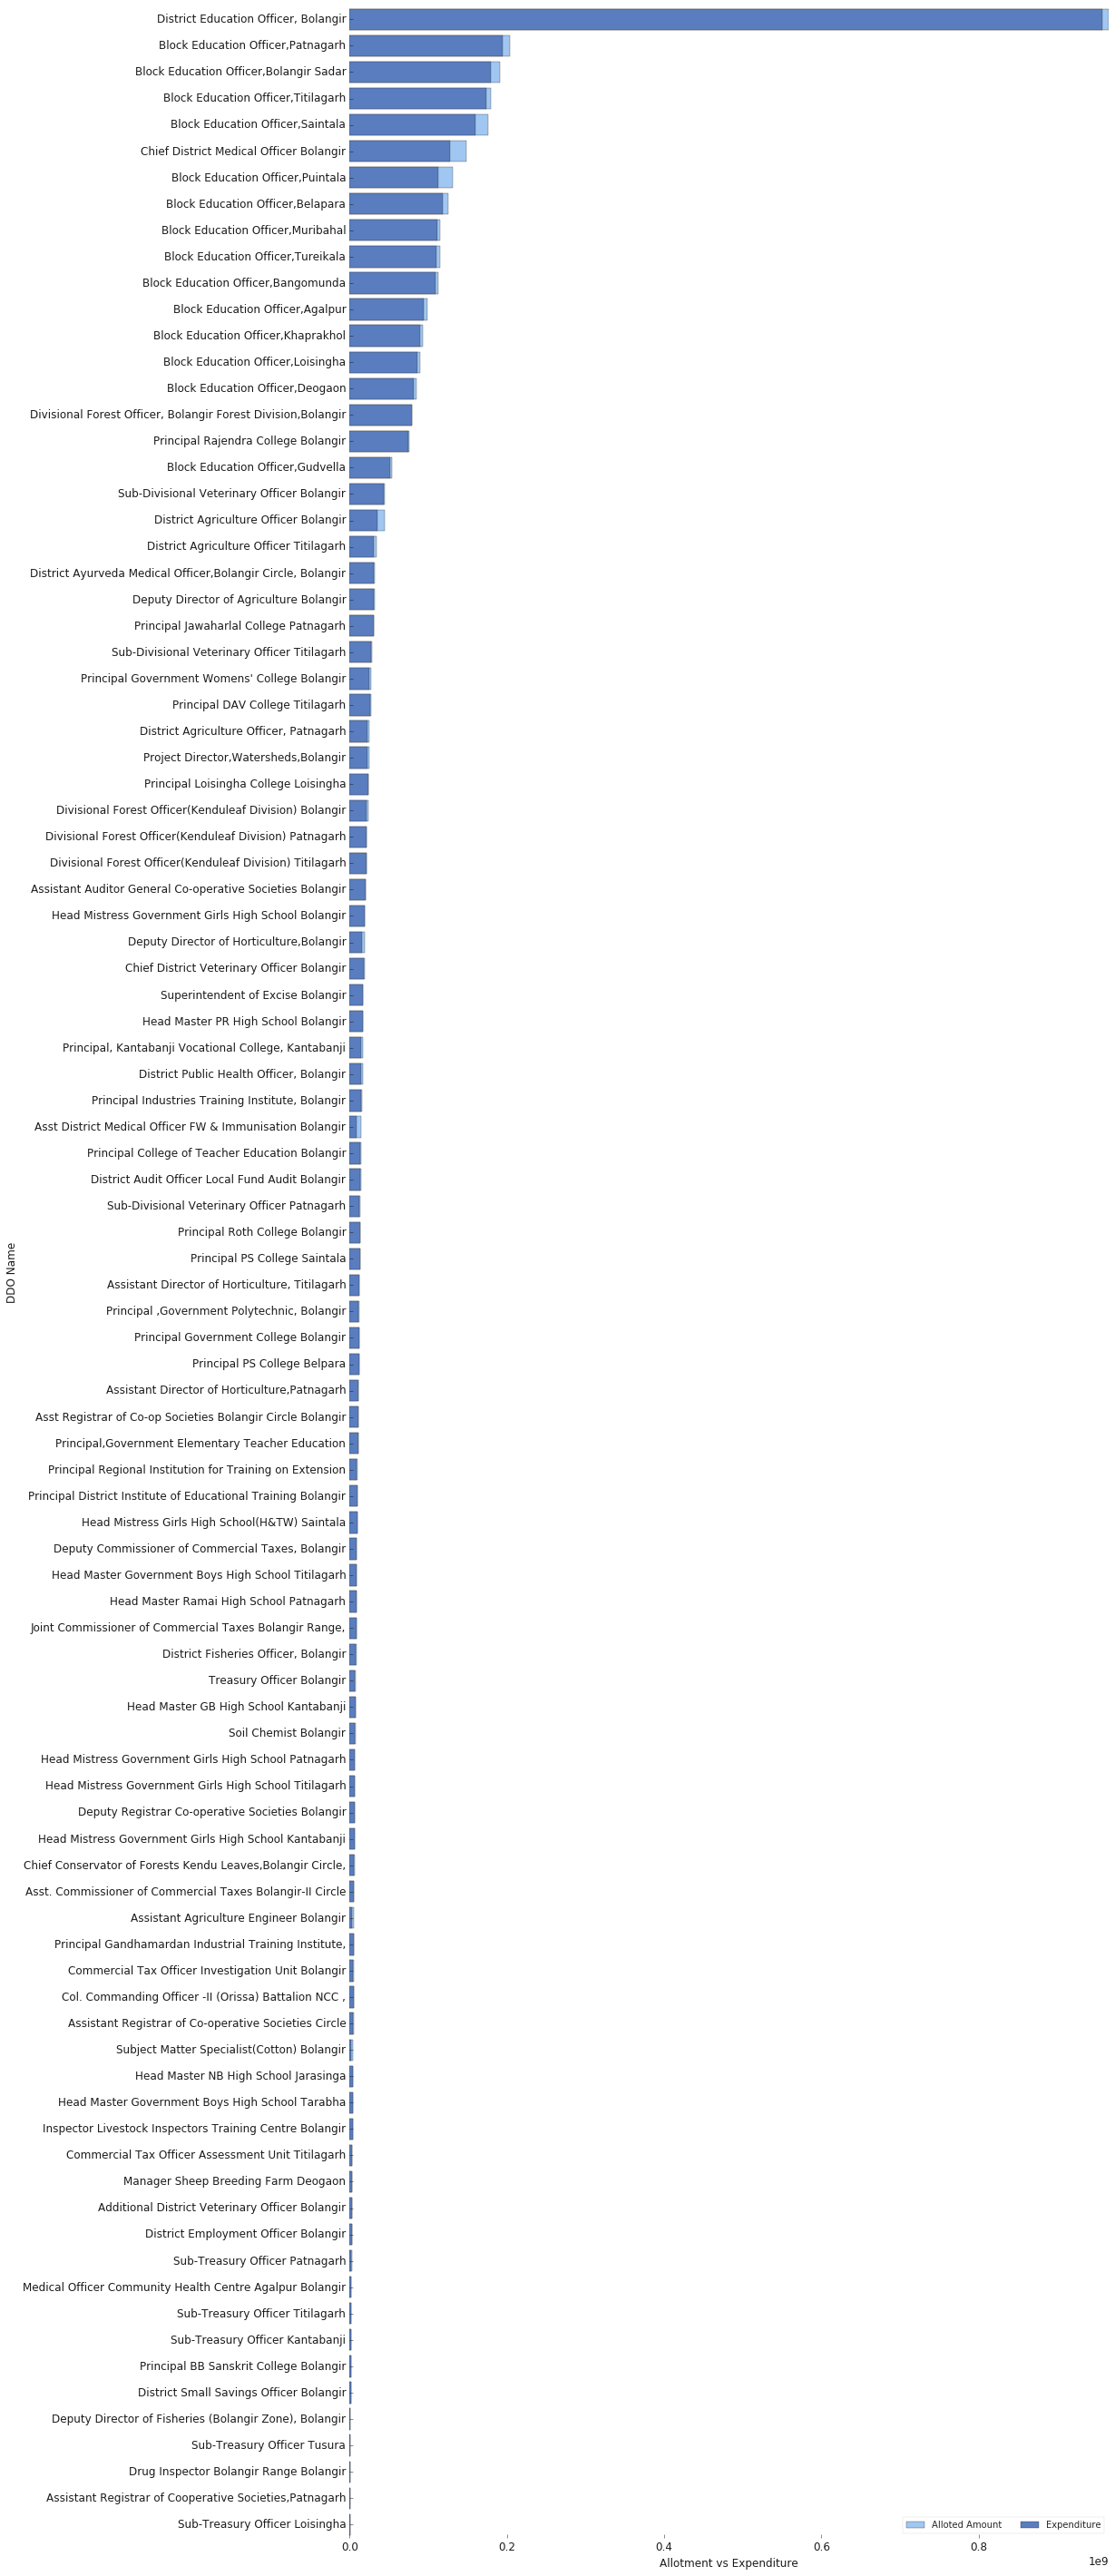

In [9]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 50))
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(x="Alloted Amount", y="DDO Name", data=DdoByAllot_df,
            label="Alloted Amount", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Expenditure", y="DDO Name", data=DdoByAllot_df,
            label="Expenditure", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 965793191), ylabel="DDO Name",
       xlabel="Allotment vs Expenditure")
sns.despine(left=True, bottom=True)

In [10]:
AllotByDate_df = df.groupby(['Allotment Date'])['Alloted Amount', 'Expenditure'].sum()
AllotByDate_df.reset_index(level=0, inplace=True)

AllotByDate_df["Allotment Date(D)"] = pd.to_datetime(AllotByDate_df['Allotment Date'])
AllotByDate_df.sort_values("Allotment Date(D)", ascending=True, inplace=True)
#AllotByDate_df["Allotment Date"].dt.date
#AllotByDate_df["Allotment Date"] = str(AllotByDate_df["Allotment Date"])
AllotByDate_df.head()

,Allotment Date,Alloted Amount,Expenditure,Allotment Date(D)
7,02-Apr-16,22005250,21995250,2016-04-02
27,04-Apr-16,21224485,21220485,2016-04-04
37,05-Apr-16,8881803,8858156,2016-04-05
44,06-Apr-16,1471000,1471000,2016-04-06
53,07-Apr-16,81329840,81321840,2016-04-07


/home/akshay/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:1743: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


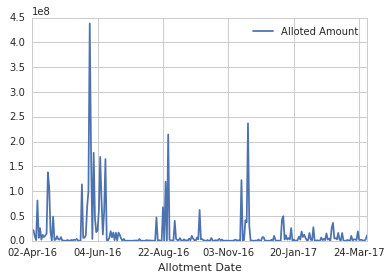

In [11]:
AllotByDate_df[['Allotment Date','Alloted Amount']].set_index('Allotment Date').plot()

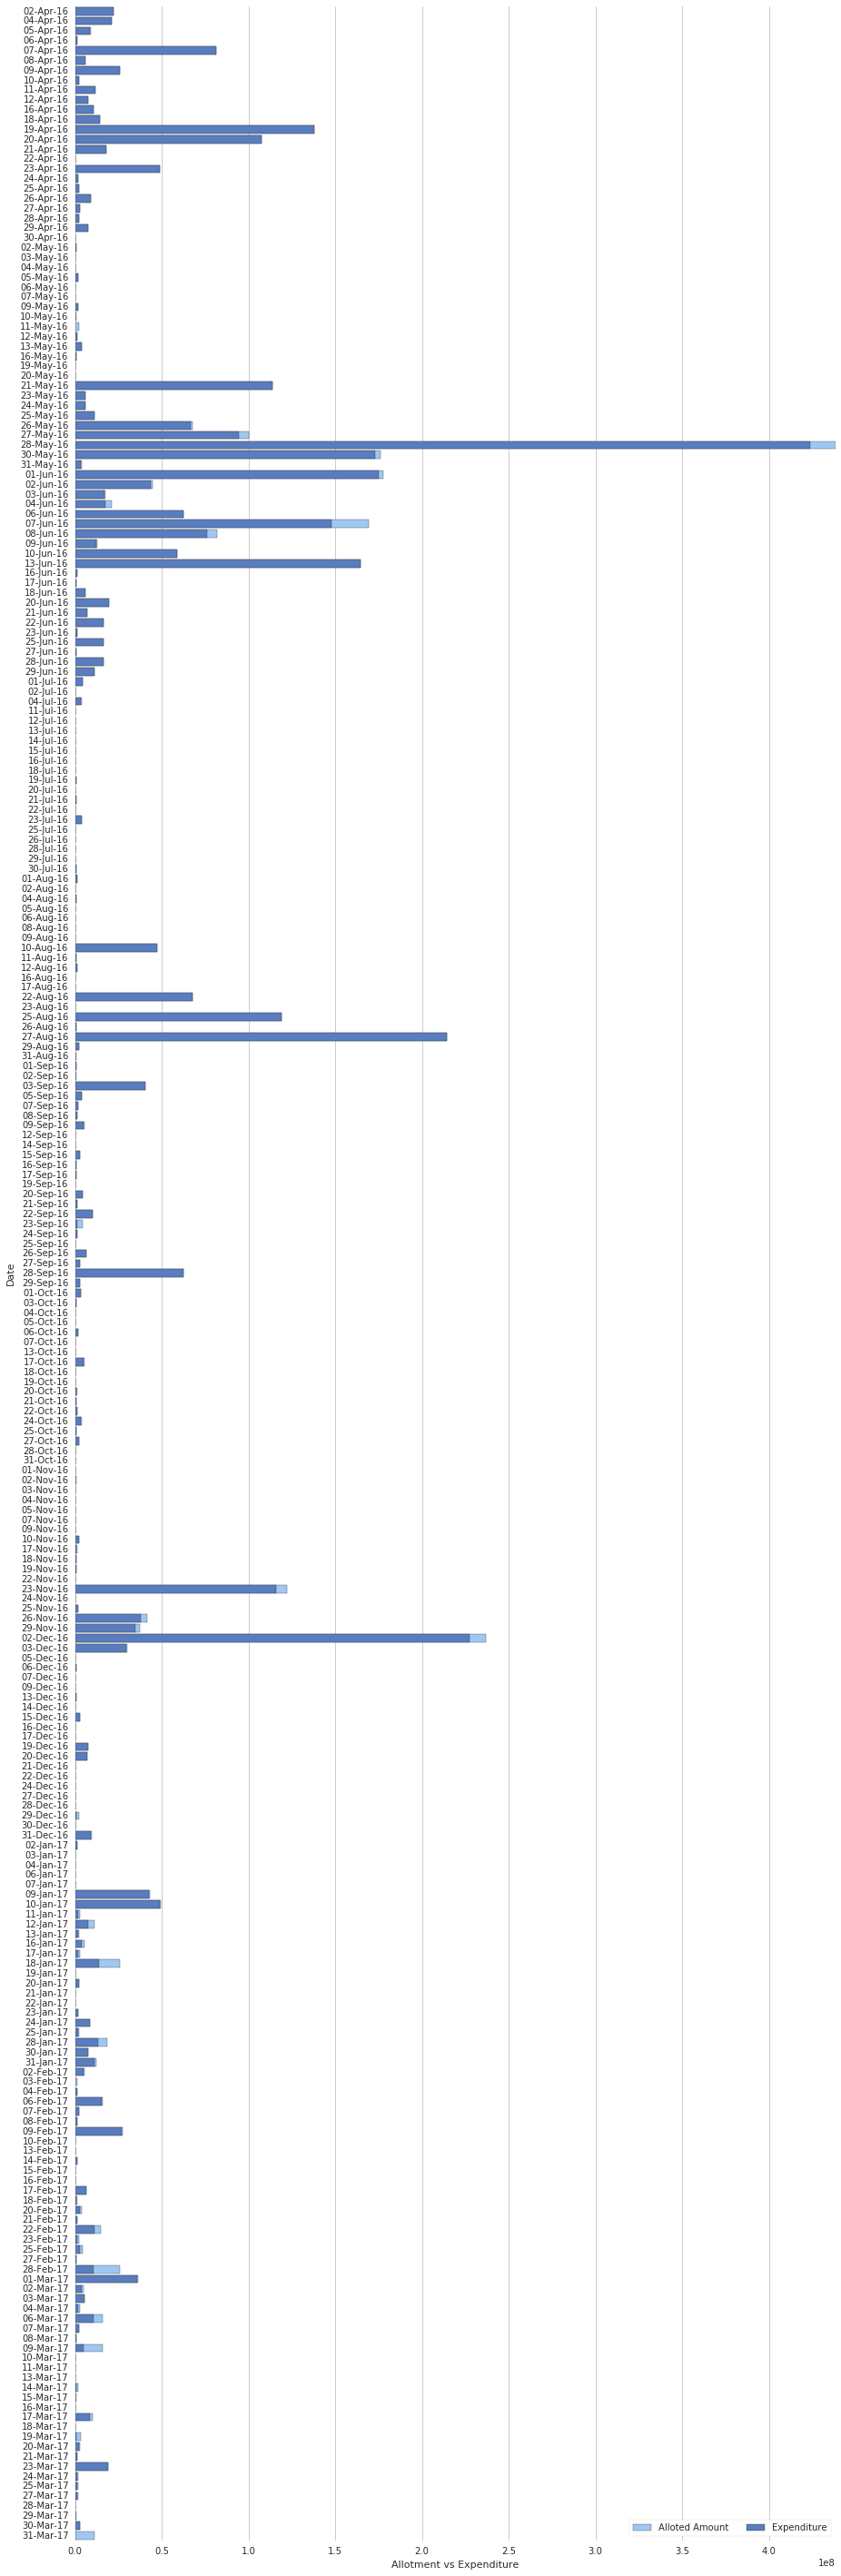

In [12]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 50))
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(x="Alloted Amount", y="Allotment Date", data=AllotByDate_df,
            label="Alloted Amount", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Expenditure", y="Allotment Date", data=AllotByDate_df,
            label="Expenditure", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 438079286), ylabel="Date",
       xlabel="Allotment vs Expenditure")
sns.despine(left=True, bottom=True)

In [13]:
BudgetCode_df = df.groupby(['Budget Code'])['Alloted Amount', 'Expenditure'].sum()
BudgetCode_df.head()

,Alloted Amount,Expenditure
Budget Code,,
05-2040-00-001-0308-01003-136-0-1-0,1230186,1136545
05-2040-00-001-0308-01003-156-0-1-0,2274568,1563612
05-2040-00-001-0308-01003-403-0-1-0,43032,34231
05-2040-00-001-0308-01003-516-0-1-0,35000,34104
05-2040-00-001-0308-01003-523-0-1-0,1583,852


In [14]:
BudgetCode_df.reset_index(level=0, inplace=True)
BudgetCode_df.sort_values("Alloted Amount", ascending=False, inplace=True)

In [15]:
BudgetCode_df.head()

,Budget Code,Alloted Amount,Expenditure
95,10-2202-05-103-0554-01003-156-0-1-0,965526306,957095013
60,10-2202-01-101-2978-01003-136-0-1-0,661642076,633288587
61,10-2202-01-101-2978-01003-156-0-1-0,359765912,330867300
57,10-2202-01-101-0556-01003-156-0-1-0,300962047,290821137
111,12-2210-01-110-1016-01004-000-0-1-0,141625887,121635822


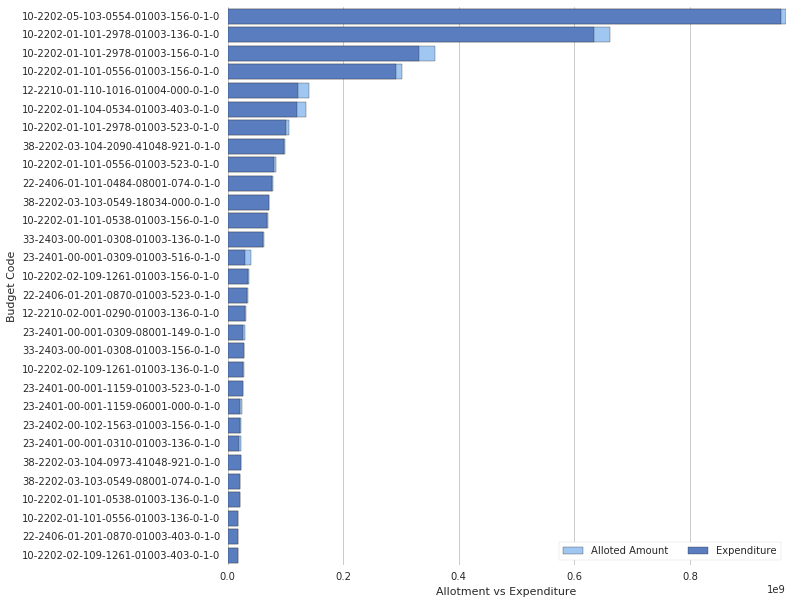

In [16]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(x="Alloted Amount", y="Budget Code", data=BudgetCode_df[:30],
            label="Alloted Amount", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Expenditure", y="Budget Code", data=BudgetCode_df[:30],
            label="Expenditure", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 965526306), ylabel="Budget Code",
       xlabel="Allotment vs Expenditure")
sns.despine(left=True, bottom=True)